In [1]:
from dataset import p2_Dataset

import torch
from torchvision import transforms
from PIL import Image

from model import VGG16_FCN8s, VGG16_FCN32s

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = p2_Dataset('../hw2_data/p2_data/train', transform)

In [3]:
class_map = [(0,255,255),(255,255,0),(255,0,255),(0,255,0),(0,0,255),
             (255,255,255),(0,0,0)]
classes = ['Urban','Agriculture','Rangeland','Forest','Water','Barren','Unknown']

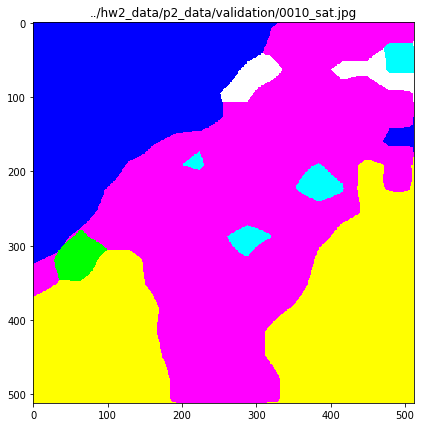

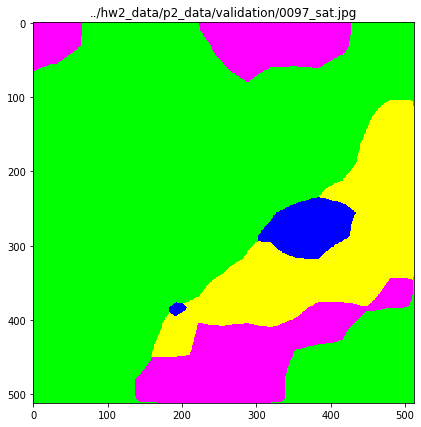

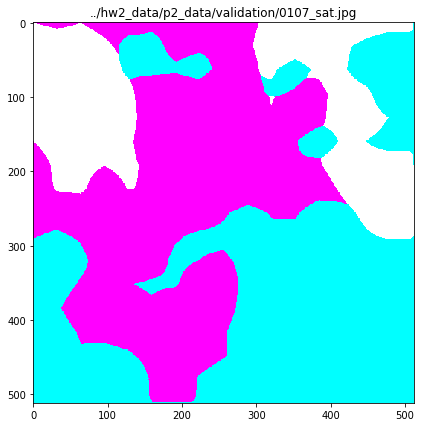

In [4]:
size=512
transform = transforms.Compose([
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

def inference(path):
    model = VGG16_FCN32s(n_classes=7)
    model.load_state_dict(torch.load('result/20_fcn32s.pth'))    
    
    global transform
    img = Image.open(path).convert('RGB') 
    img = transform(img)
    
    batch = img.unsqueeze(0)
    
    out = model(img.unsqueeze(0))
    out = out[0].detach().cpu().numpy()
    out = np.argmax(out, axis=0)
    
    out_img = np.zeros((512,512,3)).astype(np.uint8)
    for i in range(7):
        out_img[ out==i ] = class_map[i]
    
    plt.figure(figsize=(15,7))
    plt.title(path)
    plt.imshow(out_img)
    plt.show()
    
img_ls = ['0010_sat.jpg','0097_sat.jpg','0107_sat.jpg']
for img in img_ls:
    inference(f'../hw2_data/p2_data/validation/{img}')